<a href="https://colab.research.google.com/github/PrachitiSParulekar/machine-learning-end-to-end-pipeline/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['target'] = data.target

In [ ]:
df.shape

(569, 31)

In [ ]:
df.info

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
df['target'].value_counts()

,count
target,
1,357
0,212


In [ ]:
print("Proportion (%):")
print((df['target'].value_counts(normalize=True) * 100).round(2))

Proportion (%):
target
1    62.74
0    37.26
Name: proportion, dtype: float64


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import StandardScaler
features = df.drop(columns=['target'], axis=1)
target = df['target']

In [ ]:
#standardize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [ ]:
print("Feature means (should be ~0 after scaling):")
print(X_scaled.mean().round(2))
print("\nFeature stds (should be ~1 after scaling):")
print(X_scaled.std().round(2))

Feature means (should be ~0 after scaling):
mean radius               -0.0
mean texture              -0.0
mean perimeter            -0.0
mean area                 -0.0
mean smoothness            0.0
mean compactness          -0.0
mean concavity            -0.0
mean concave points        0.0
mean symmetry             -0.0
mean fractal dimension    -0.0
radius error              -0.0
texture error             -0.0
perimeter error            0.0
area error                -0.0
smoothness error          -0.0
compactness error         -0.0
concavity error            0.0
concave points error      -0.0
symmetry error            -0.0
fractal dimension error   -0.0
worst radius              -0.0
worst texture              0.0
worst perimeter           -0.0
worst area                 0.0
worst smoothness          -0.0
worst compactness         -0.0
worst concavity            0.0
worst concave points      -0.0
worst symmetry            -0.0
worst fractal dimension    0.0
dtype: float64

Feature st

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(
      X_scaled, y,
      test_size=0.2,
      random_state=42,
      stratify=y
)

In [ ]:
print("Train/Test Split Complete!")
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training target distribution: {pd.Series(y_train).value_counts()}")
print(f"Test target distribution: {pd.Series(y_test).value_counts()}")

Train/Test Split Complete!
Training set size: (455, 30)
Test set size: (114, 30)
Training target distribution: 1    285
0    170
Name: count, dtype: int64
Test target distribution: 1    72
0    42
Name: count, dtype: int64


In [ ]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
n_features = X_train.shape[1]
weights = np.zeros(n_features)
bias = 0.0

# Hyperparameters
learning_rate = 0.01
n_epochs = 300

# For tracking loss
loss_history = []

# Training loop (gradient descent)
for epoch in range(n_epochs):
    # Linear model
    linear_output = np.dot(X_train, weights) + bias
    predictions = sigmoid(linear_output)

    # Calculate loss (binary cross-entropy)
    epsilon = 1e-8  # Avoid log(0)
    loss = -np.mean(y_train * np.log(predictions + epsilon) + (1 - y_train) * np.log(1 - predictions + epsilon))
    loss_history.append(loss)

    # Gradients
    dw = np.dot(X_train.T, (predictions - y_train)) / len(y_train)
    db = np.mean(predictions - y_train)

    # Update weights
    weights -= learning_rate * dw
    bias -= learning_rate * db

    # Print loss every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss:.4f}")


Epoch 50/300, Loss: 0.3269
Epoch 100/300, Loss: 0.2443
Epoch 150/300, Loss: 0.2052
Epoch 200/300, Loss: 0.1814
Epoch 250/300, Loss: 0.1651
Epoch 300/300, Loss: 0.1531


Train accuracy: 0.9736, Log-loss: 0.1529
Test accuracy: 0.9561, Log-loss: 0.1801


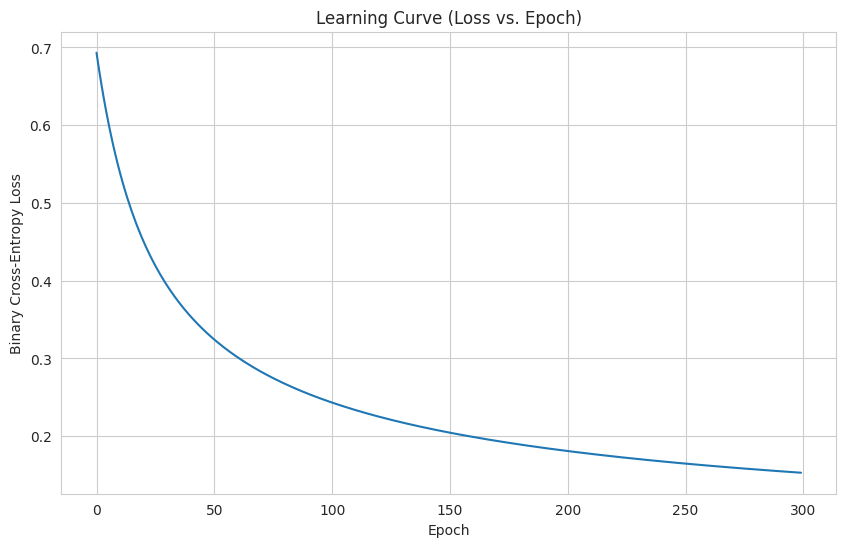

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

# Predict probability for train and test
def predict_prob(X, weights, bias):
    return sigmoid(np.dot(X, weights) + bias)

# Predict class label (using 0.5 threshold)
def predict_class(X, weights, bias):
    return (predict_prob(X, weights, bias) >= 0.5).astype(int)

# --- Evaluate on train set ---
y_train_prob = predict_prob(X_train, weights, bias)
y_train_pred = predict_class(X_train, weights, bias)
train_acc = accuracy_score(y_train, y_train_pred)
train_loss = log_loss(y_train, y_train_prob)

# --- Evaluate on test set ---
y_test_prob = predict_prob(X_test, weights, bias)
y_test_pred = predict_class(X_test, weights, bias)
test_acc = accuracy_score(y_test, y_test_pred)
test_loss = log_loss(y_test, y_test_prob)

print(f"Train accuracy: {train_acc:.4f}, Log-loss: {train_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}, Log-loss: {test_loss:.4f}")

# --- Plot learning curve ---
plt.plot(loss_history)
plt.title("Learning Curve (Loss vs. Epoch)")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
auc_score = roc_auc_score(y_test, y_test_prob)
print(f"\nROC-AUC Score: {auc_score:.4f}")


Confusion Matrix:
 [[39  3]
 [ 2 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


ROC-AUC Score: 0.9937


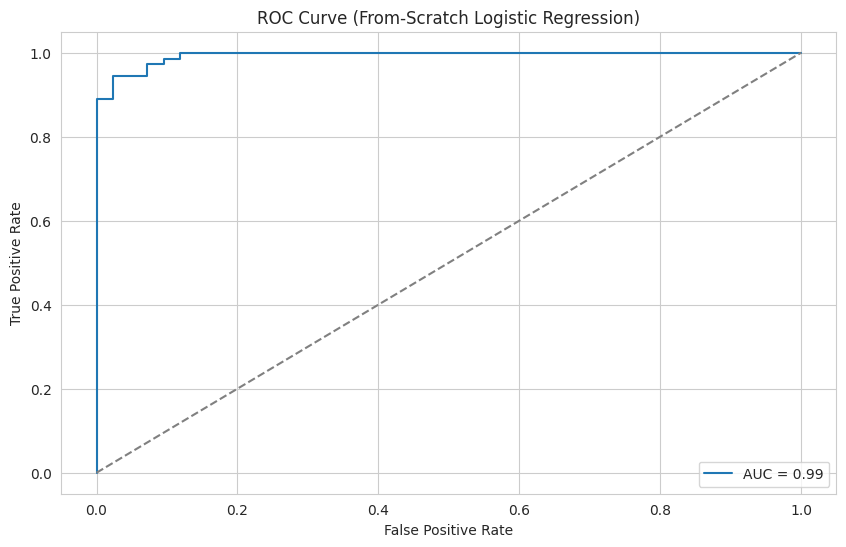

In [ ]:

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (From-Scratch Logistic Regression)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train library logistic regression (no regularization for fair comparison)
lib_model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000, random_state=42)
lib_model.fit(X_train, y_train)

# Predictions
y_test_pred_lib = lib_model.predict(X_test)
y_test_prob_lib = lib_model.predict_proba(X_test)[:, 1]

# Evaluation
lib_acc = accuracy_score(y_test, y_test_pred_lib)
lib_logloss = log_loss(y_test, y_test_prob_lib)
lib_auc = roc_auc_score(y_test, y_test_prob_lib)
print(f"(sklearn) Test Accuracy: {lib_acc:.4f}, Log-loss: {lib_logloss:.4f}, ROC-AUC: {lib_auc:.4f}")

# Compare coefficients
print("\nFirst 5 coefficients (library):")
print(lib_model.coef_[0][:5])
print("\nFirst 5 coefficients (scratch):")
print(weights[:5])

(sklearn) Test Accuracy: 0.9211, Log-loss: 2.5859, ROC-AUC: 0.9726

First 5 coefficients (library):
[  21.42092962 -114.50181935   22.43725638  -48.28185334  -77.53392176]

First 5 coefficients (scratch):
[-0.26179509 -0.19765844 -0.26118474 -0.24957392 -0.1160546 ]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for L1 and L2 regularization
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both l1 and l2
}

grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-val accuracy:", grid.best_score_)
best_model = grid.best_estimator_

# Evaluate on test set
y_test_pred_cv = best_model.predict(X_test)
y_test_prob_cv = best_model.predict_proba(X_test)[:, 1]
print("Test accuracy (best CV model):", accuracy_score(y_test, y_test_pred_cv))
print("Test ROC-AUC (best CV model):", roc_auc_score(y_test, y_test_prob_cv))

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-val accuracy: 0.9802197802197803
Test accuracy (best CV model): 0.9824561403508771
Test ROC-AUC (best CV model): 0.9953703703703703


Top features by absolute coefficient value:
worst texture: -1.225
radius error: -1.125
worst area: -0.962
worst radius: -0.955
worst concave points: -0.933
area error: -0.921
worst symmetry: -0.917
worst concavity: -0.826
worst perimeter: -0.770
worst smoothness: -0.741


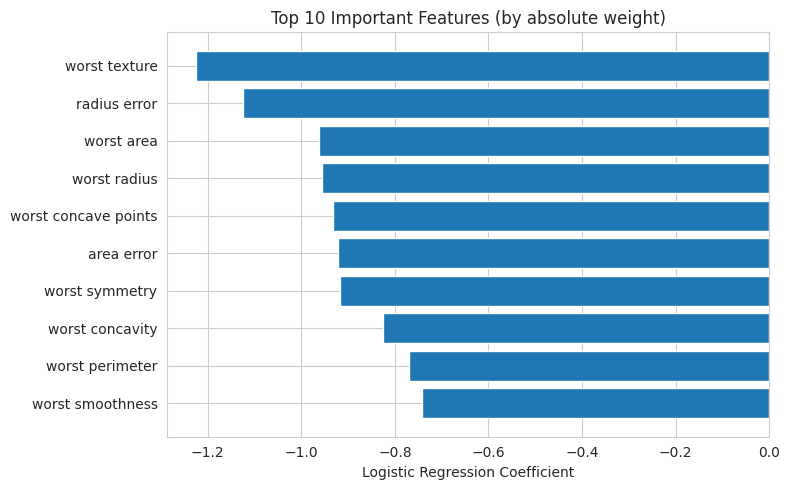

In [ ]:
import numpy as np

# Get coefficients and feature names
feature_names = X_train.columns if hasattr(X_train, 'columns') else features.columns
coef = best_model.coef_[0]

# Sort features by absolute value of coefficients
sorted_idx = np.argsort(np.abs(coef))[::-1]
top_n = 10  # Change as you wish to see more or fewer top features

print("Top features by absolute coefficient value:")
for i in range(top_n):
    print(f"{feature_names[sorted_idx[i]]}: {coef[sorted_idx[i]]:.3f}")

# Bar plot of top features
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(
    [feature_names[i] for i in sorted_idx[:top_n]][::-1],  # Labels, reversed for top-down
    coef[sorted_idx[:top_n]][::-1]  # Coefficients, reversed for top-down
)
plt.xlabel("Logistic Regression Coefficient")
plt.title(f"Top {top_n} Important Features (by absolute weight)")
plt.tight_layout()
plt.show()

Indices of misclassified test samples: [16 53]
Number misclassified: 2


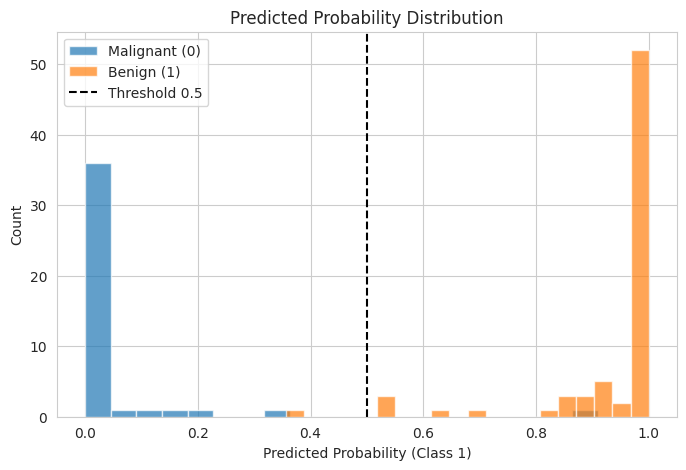

Number of 'hard' predictions (0.4 < p < 0.6): 3
Indices of hard predictions: [ 3 51 66]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Find misclassified test samples
misclassified_idx = np.where(y_test != y_test_pred_cv)[0]
print("Indices of misclassified test samples:", misclassified_idx)
print(f"Number misclassified: {len(misclassified_idx)}")

# Plot probability distributions for both classes
plt.figure(figsize=(8, 5))
plt.hist(y_test_prob_cv[y_test == 0], bins=20, alpha=0.7, label="Malignant (0)")
plt.hist(y_test_prob_cv[y_test == 1], bins=20, alpha=0.7, label="Benign (1)")
plt.axvline(0.5, color='k', linestyle='--', label="Threshold 0.5")
plt.title("Predicted Probability Distribution")
plt.xlabel("Predicted Probability (Class 1)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

# Visualize "hard" predictions (probabilities near threshold)
uncertain_mask = np.abs(y_test_prob_cv - 0.5) < 0.1
hard_cases_idx = np.where(uncertain_mask)[0]
print(f"Number of 'hard' predictions (0.4 < p < 0.6): {len(hard_cases_idx)}")
print("Indices of hard predictions:", hard_cases_idx)